# About this notebook

This notebook is just used to quickly demonstrate some basic functionality of PHIDL.  For more expansive tutorials with more thorough explanations, please see the [PHIDL tutorials in the official documentation](https://phidl.readthedocs.io/))


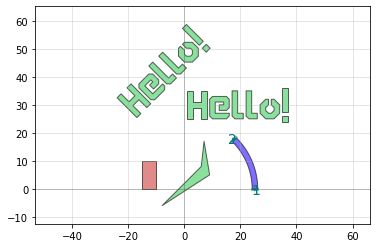

In [1]:
# Boilerplate stuff 
from phidl import Device
from phidl import quickplot as qp # Rename "quickplot()" to the easier "qp()"
import phidl.geometry as pg


# Create a blank device (essentially an empty GDS cell with some special features)
D = Device('mydevice')

# Create and add a polygon from separate lists of x points and y points
# (Can also be added like [(x1,y1), (x2,y2), (x3,y3), ... ]
poly1 = D.add_polygon( [(-8,6,7,9), (-6,8,17,5)], layer = 0)

# Create some new geometry from the functions available in the geometry library
T = pg.text('Hello!')
C = pg.arc(radius = 25, width = 2, theta = 45, layer = 1)
R = pg.rectangle(size = [5,10], layer = 2)

# Add references to the new geometry to D, our blank device
text1 = D.add_ref(T) # Add the text we created as a reference
text2 = D << T # Using the << operator (identical to add_ref()), add the same geometry a second time
c = D << C # Add the arc we created
r = D << R # Add the rectangle we created

# Now that the geometry has been added to "D", we can move everything around:
text1.movey(25)
text2.move([5,30])
text2.rotate(45)
r.movex(-15)

qp(D) # quickplot it!


# Smarter movement with **ports**

Any Device can have "Port"s in it which allow you to snap geometry together like legos.  Below is an example where we write a simple function to make a rectangular waveguide, assign ports to the ends of the rectangle, and then snap those rectangles together

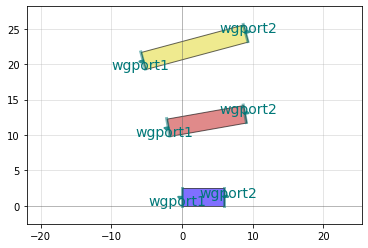

In [2]:

def waveguide(width = 10, height = 1, layer = 0):
    WG = Device('waveguide')
    WG.add_polygon( [(0, 0), (width, 0), (width, height), (0, height)], layer = layer)
    WG.add_port(name = 'wgport1', midpoint = [0,height/2], width = height, orientation = 180)
    WG.add_port(name = 'wgport2', midpoint = [width,height/2], width = height, orientation = 0)
    return WG

D = Device()

wg1 = D << waveguide(width=6, height = 2.5, layer = 1)
wg2 = D << waveguide(width=11, height = 2.5, layer = 2)
wg3 = D << waveguide(width=15, height = 2.5, layer = 3)
wg2.movey(10).rotate(10)
wg3.movey(20).rotate(15)

# And plot the result!
qp(D)


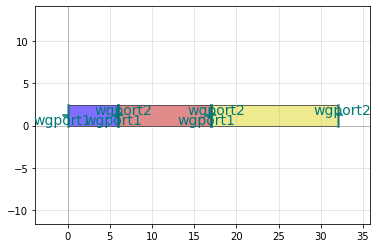

In [3]:
# Now we can connect everything together using the ports:

# Each waveguide has two ports: 'wgport1' and 'wgport2'.  These are arbitrary 
# names defined in our waveguide() function above

# Let's keep wg1 in place on the bottom, and connect the other waveguides to it.
# To do that, on wg2 we'll grab the "wgport1" port and connect it to the "wgport2" on wg1:
wg2.connect('wgport1', wg1.ports['wgport2'])
# Next, on wg3 let's grab the "wgport1" port and connect it to the "wgport2" on wg2:
wg3.connect('wgport1', wg2.ports['wgport2'])

# And plot the result!
qp(D)
